In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
mobile = pd.read_csv('mobile_prices.csv')

In [4]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
mobile.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


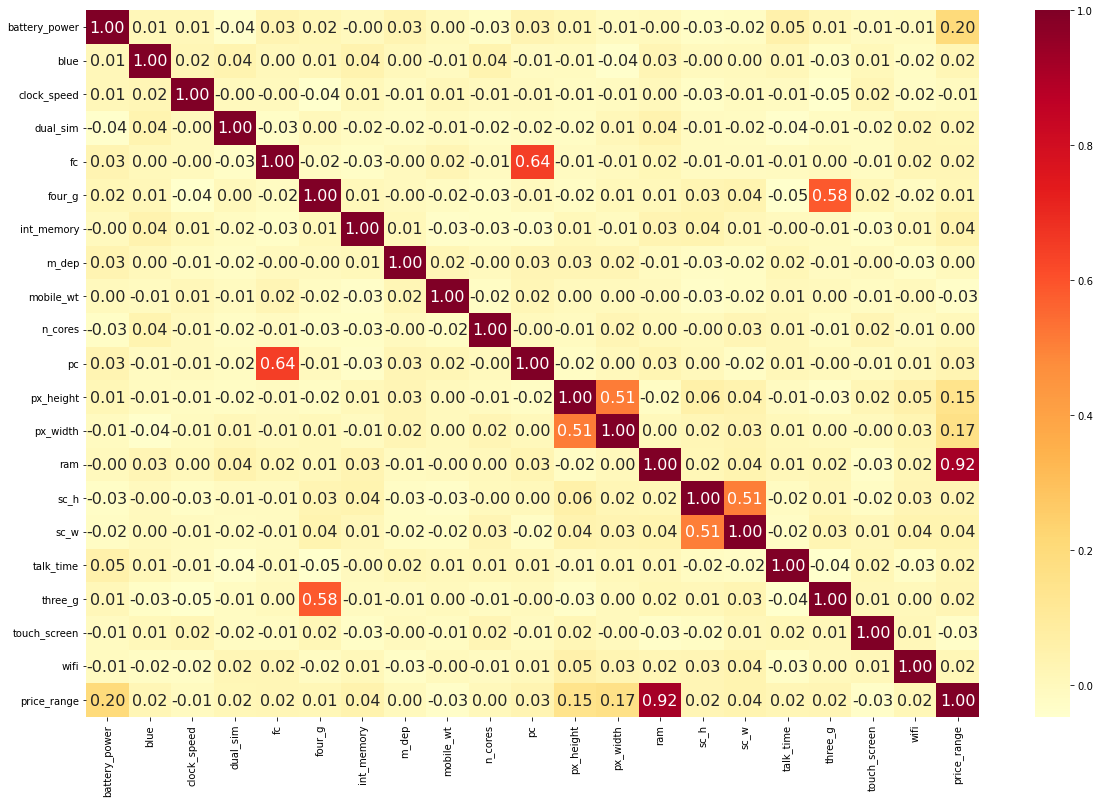

In [29]:
corr = mobile.corr()
plt.figure(figsize=(20, 13))
sns.heatmap(corr, annot=True, annot_kws={'size':16}, cmap='YlOrRd', fmt='0.2f')
plt.show()

In [47]:
corr.sort_values(by='price_range', ascending=False).price_range

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [49]:
mobile.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [54]:
mobile.notna().all()

battery_power    True
blue             True
clock_speed      True
dual_sim         True
fc               True
four_g           True
int_memory       True
m_dep            True
mobile_wt        True
n_cores          True
pc               True
px_height        True
px_width         True
ram              True
sc_h             True
sc_w             True
talk_time        True
three_g          True
touch_screen     True
wifi             True
price_range      True
dtype: bool

In [55]:
mobile.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [62]:
X = mobile.drop(labels=['price_range'], axis=1)
y = mobile['price_range']

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

In [70]:
# pipe = Pipeline([('scaler', StandardScaler()), ('SVC', SVC())])

In [72]:
# pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('SVC', SVC())])

In [78]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [79]:
x_test = scaler.transform(x_test)

In [80]:
Svm = SVC(kernel='linear')
Svm.fit(x_train, y_train)

SVC(kernel='linear')

In [81]:
y_pred_test = Svm.predict(x_test)

In [105]:
from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve, classification_report, confusion_matrix

In [83]:
pd.crosstab(y_test, y_pred_test)

col_0,0,1,2,3
price_range,,,,
0,97,4,0,0
1,4,99,3,0
2,0,0,94,5
3,0,0,1,93


In [84]:
accuracy_score(y_test, y_pred_test)

0.9575

<AxesSubplot:>

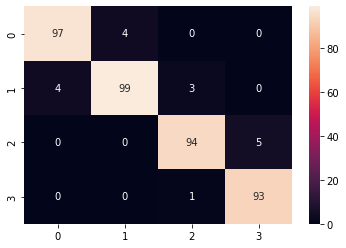

In [106]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)

In [108]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       101
           1       0.96      0.93      0.95       106
           2       0.96      0.95      0.95        99
           3       0.95      0.99      0.97        94

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

